# Unconstrained Optimization - Part III

## Quasi-Newton
Given the difficulty of computing the Hessian (second derivative), can approximate it numerically using approaches such as finite differences of the gradients

But then given the cost of computing (or approximating) the Hessian and then inverting it, one can just also approximate it (or its inverse), leading to Quasi-Newton approximation methods 

**BFGS** (Broyden-Fletcher-Goldfarb-Shanno) one of the best well known

This notebook explores the solution paths for Steepest Descent and BFGS on the classic Rosenbrock test function

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://www.dropbox.com/s/3aoexl8vxyitmds/basic_material.py?dl=0
%run basic_material

try:
    %reload_ext autoreload
except:
    %load_ext autoreload
%autoreload 2

plt.rcParams['axes.grid'] = False

if os.path.isdir("./figs/"):
    pass
else:
    !mkdir ./figs

Running Python: 3.9.9


In [2]:
# Classic test problem
x0 = np.array([-0.1, 2]) # initial condition
#x0 = np.array([-2, 2]) # initial condition

def Rosenbrock(X):
    x,y = X
    return 100*(x**2-y)**2+(1-x)**2

def Rosenbrock_g(X):
    x,y = X
    return np.array([(400*(x**2-y)*x - 2*(1-x)), -200*(x**2-y)])

def Steepest_Descent(x):
    Niter = 1500 # arbitrary
    SD_sol = np.zeros((Niter,3))
    start_point = x
    for k in range(Niter):
        SD_sol[k,:] = np.array([start_point[0],start_point[1],Rosenbrock(start_point)])
        search_gradient = Rosenbrock_g(start_point)
        sol = line_search(Rosenbrock, Rosenbrock_g, start_point, -search_gradient)
        start_point = start_point - sol[0]*search_gradient
    return SD_sol

def store(x):
        all_x_i.append(x[0])
        all_y_i.append(x[1])
        all_f_i.append(Rosenbrock(x))


In [3]:
# 2 solution algorithms
SD_sol = Steepest_Descent(x0)

all_x_i=[]
all_y_i=[]
all_f_i=[]
        
store(x0)
X2 = scipy.optimize.minimize(Rosenbrock, x0, method='BFGS',callback=store, options={'disp': True})
print('\nBFGS Final x value =', X2.x)
print('BFGS ftn evals =', X2.nfev)
print('BFGS Final functional value = ', round(Rosenbrock(X2.x)))
BFGS_sol=np.array([all_x_i,all_y_i,all_f_i])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 39
         Function evaluations: 150
         Gradient evaluations: 50

BFGS Final x value = [ 1.0000  1.0000]
BFGS ftn evals = 150
BFGS Final functional value =  0


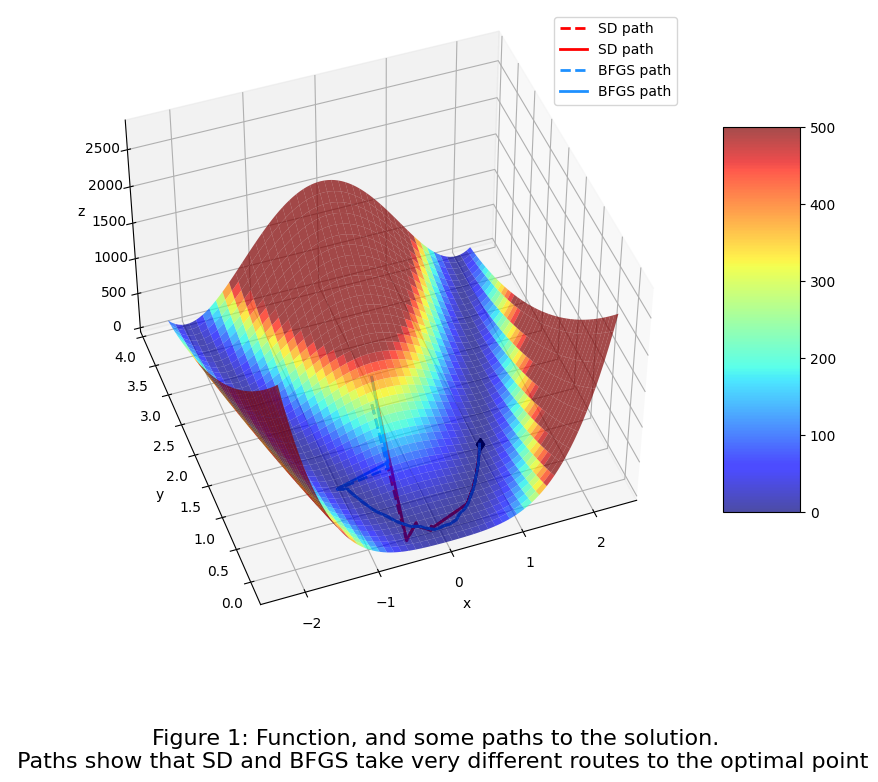

In [4]:
# Show solution paths in a surface plot
x = np.arange(-2.25, 2.25, 0.05)
y = np.arange(-0.25, 4, 0.05)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock([X, Y])

# set up the figure
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.azim = -110
ax.dist = 10
ax.elev = 45
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-0.25, 4)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# plot the figure
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, alpha = 0.7, vmin=0, vmax=500)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.plot([1, 1],[1, 1],[0, 0],'kd')
ax.plot(SD_sol[:,0], SD_sol[:,1], color='red', linewidth=2, linestyle='dashed',label='SD path')
ax.plot(SD_sol[:,0], SD_sol[:,1], SD_sol[:,2], color='red', linewidth=2,label='SD path')
ax.plot(BFGS_sol[0,:], BFGS_sol[1,:], color='dodgerblue', linewidth=2, linestyle='dashed',label='BFGS path')
ax.plot(BFGS_sol[0,:], BFGS_sol[1,:], BFGS_sol[2,:], color='dodgerblue', linewidth=2,label='BFGS path')
ax.legend()
txt="Figure 1: Function, and some paths to the solution. \n Paths show that SD and BFGS take very different routes to the optimal point"
plt.figtext(0.5,0.05,txt, wrap=True, horizontalalignment='center', fontsize=16)
plt.savefig("figs/BFGS_1.png")
plt.show()

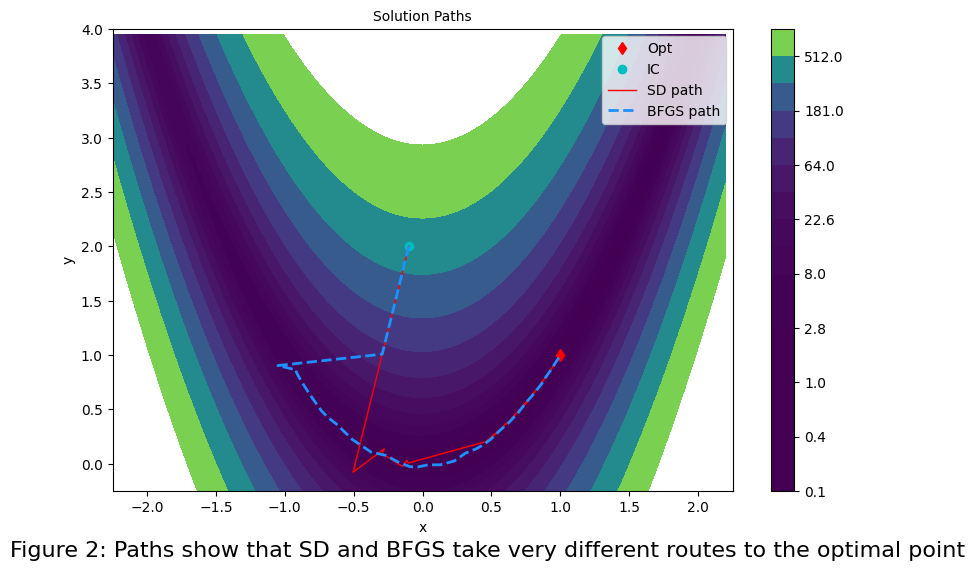

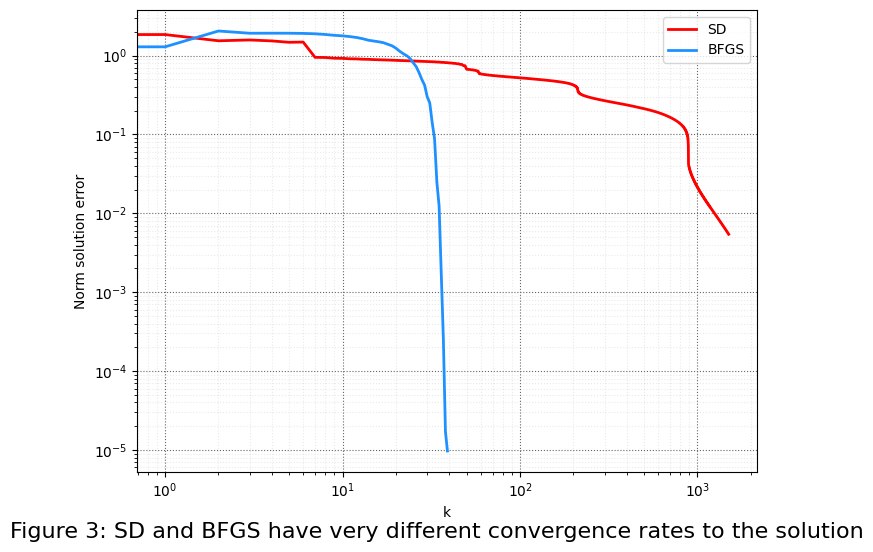

In [5]:
# Show solution paths in a contour plot
# plot the figure
fig,ax=plt.subplots(1,1,figsize=(10,6))
cp = ax.contourf(X, Y, Z,2**np.arange(-3, 10, .75))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Solution Paths')
ax.set_xlim(-2.25, 2.25)
ax.set_ylim(-0.25, 4)
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.plot(1,1, 'rd',label='Opt')
plt.plot(x0[0],x0[1], 'co',label='IC')
ax.plot(SD_sol[:,0], SD_sol[:,1], color='red', linewidth=1, linestyle='solid',label='SD path')
ax.plot(BFGS_sol[0,:], BFGS_sol[1,:], color='dodgerblue', linewidth=2, linestyle='dashed',label='BFGS path')
ax.legend()
txt="Figure 2: Paths show that SD and BFGS take very different routes to the optimal point"
plt.figtext(0.5,0,txt, wrap=True, horizontalalignment='center', fontsize=16)
plt.savefig("figs/BFGS_2.png")

# Error plot for the 2 algorithms
fig = plt.figure(2,figsize=(8,6))
z1=np.linalg.norm(SD_sol[:,0:2]-1,axis=1)
z2=np.linalg.norm(BFGS_sol[0:2,:]-1,axis=0)
plt.loglog(z1,'r',label='SD')
plt.loglog(z2,color='dodgerblue',label='BFGS')
plt.xlabel('k')
plt.legend()
plt.ylabel('Norm solution error')
nicegrid()
txt="Figure 3: SD and BFGS have very different convergence rates to the solution"
plt.figtext(0.5,0,txt, wrap=True, horizontalalignment='center', fontsize=16)
plt.savefig("figs/BFGS_3.png")
plt.show()

## Experiment: try different initial conditions and see how much the SD and BFGS solution paths vary

In [6]:
# Show solution paths in a contour plot
# plot the figure
xx = np.arange(-4, 4, 0.05)
yy = np.arange(-2, 12, 0.05)
X, Y = np.meshgrid(xx, yy)
Z = Rosenbrock([X, Y])

def f(Initial_x = -2 , Initial_y=2):
    x0 = np.array([Initial_x, Initial_y]) # initial condition

    SD_sol = Steepest_Descent(x0)

    all_x_i=[]
    all_y_i=[]
    all_f_i=[]
    def store(x):
            all_x_i.append(x[0])
            all_y_i.append(x[1])
            all_f_i.append(Rosenbrock(x))
    store(x0)
    X2 = scipy.optimize.minimize(Rosenbrock, x0, method='BFGS',callback=store, options={'disp': False})
    BFGS_sol=np.array([all_x_i,all_y_i,all_f_i])

    # plot the figure
    fig = plt.figure(figsize=(12, 6)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    #fig,(ax1, ax2)=plt.subplots(1,2,figsize=(12,5))
    cp = ax1.contourf(X, Y, Z,levels=np.logspace(-1,4.5,10))#,locator=ticker.LogLocator())
    fig.colorbar(cp,ax=ax1,ticks=[0.1,1,10,100,1000]) # Add a colorbar to a plot
    ax1.set_title('Solution Paths')
    ax1.set_xlim(-4, 4)
    ax1.set_ylim(-1, 9)
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.plot(1,1, 'rd',label='Opt')
    ax1.plot(x0[0],x0[1], 'co',label='IC')
    ax1.plot(SD_sol[:,0], SD_sol[:,1], color='red', linewidth=2, linestyle='solid',label='SD path')
    ax1.plot(BFGS_sol[0,:], BFGS_sol[1,:], color='w', linewidth=2, linestyle='dashed',label='BFGS path')
    ax1.legend()

    z1=np.linalg.norm(SD_sol[:,0:2]-1,axis=1)
    z2=np.linalg.norm(BFGS_sol[0:2,:]-1,axis=0)
    ax2.loglog(z1,'r',label='SD')
    ax2.loglog(z2,color='dodgerblue',label='BFGS')
    ax2.legend()
    ax2.set_xlabel('k')
    ax2.set_ylabel('Norm solution error')
    ax2.grid(True)
    plt.show()    

    return 

interactive_plot = interactive(f, {'manual': False}, Initial_x=(-4.0, 4.0,.1), Initial_y=(-1, 8, 0.1))
output = interactive_plot.children[-1]
interactive_plot


interactive(children=(FloatSlider(value=-2.0, description='Initial_x', max=4.0, min=-4.0), FloatSlider(value=2…